# **Tutorial 1 Forecasting**



*   Moving Average
*   Eksponential Smoothing
*   Dekomposisi

## Load Library

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

## Moving Average


**Moving Average (MA)**

Moving Average (MA) adalah metode statistik untuk merata-ratakan data dalam rentang waktu tertentu Ini membantu mengidentifikasi tren atau pola dalam dataset.Ada beberapa jenis MA, termasuk:

- **Simple Moving Average (SMA):** Merata-ratakan data dengan bobot yang sama.
  
- **Double Moving Average:** Menggunakan dua tingkat moving average untuk sinyal yang lebih halus.

- **Weighted Moving Average (WMA):** Memberikan bobot berbeda untuk penekanan pada data terkini.

- **Centered Moving Average:** Merata-ratakan data di sekitar titik tertentu dengan bobot simetris.

Perbedaannya terletak pada metode perhitungan dan bobot yang digunakan, disesuaikan dengan kebutuhan analisis data dan tingkat responsivitas yang diinginkan.

### Simple Moving Average

#### Load Dataset

In [ ]:
SMA

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# Load and Read Dataset
SMA = pd.read_csv('Air_passengers.csv')
SMA.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


#### Preprocess SMA and Visualization

In [ ]:
#Import time series DMA: Airline passenger traffic
SMA.columns = ['Month','Passengers']
SMA['Month'] = pd.to_datetime(SMA['Month'], format='%Y-%m')
SMA = SMA.set_index('Month')
SMA.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


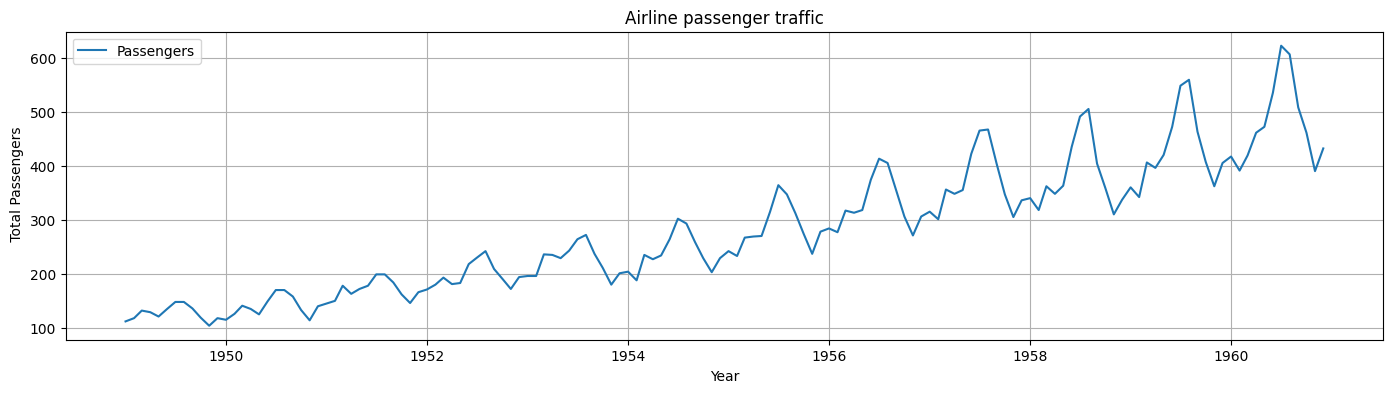

In [ ]:
# Plot the time series DMA
plt.figure(figsize=(17, 4))
plt.plot(SMA, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

#### Train, Forecasting, Plot, and Evaluating

In [ ]:
#Split time series DMA into training and test set
train_len = 120
train = SMA[0:train_len] # first 120 months as training set
test = SMA[train_len:] # last 24 months as out-of-time test set

In [ ]:
#Simple moving average method
y_hat_sma = SMA.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = SMA['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

<ipython-input-10-7d7d24d2790a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


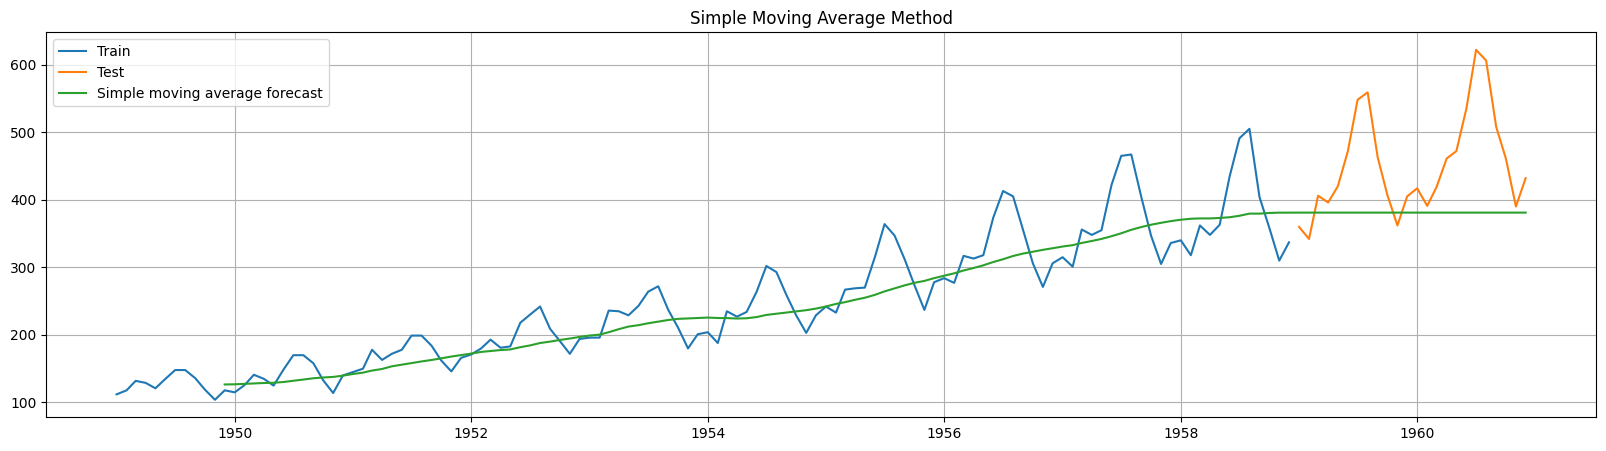

In [ ]:
#Plot train, test and forecast
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [ ]:
#Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,103.21,15.47


### Double Moving Average

#### Import Library and Read DMAset

In [ ]:
## !pip install pandas
## !pip install matplotlib
## !pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load and Read DMAset
DMA = pd.read_csv('Air_passengers.csv')
DMA.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Preprocess DMA and Visualization

In [ ]:
#Import time series DMA: Airline passenger traffic
DMA.columns = ['Month','Passengers']
DMA['Month'] = pd.to_datetime(DMA['Month'], format='%Y-%m')
DMA = DMA.set_index('Month')
DMA.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


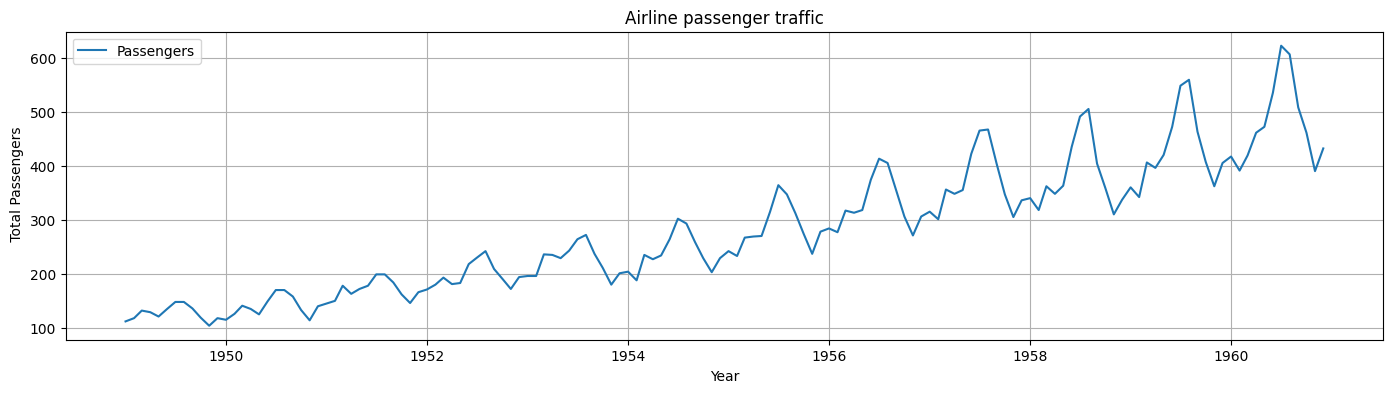

In [ ]:
# Plot the time series DMA
plt.figure(figsize=(17, 4))
plt.plot(DMA, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

#### Forecasting and Evaluating

In [ ]:
# First Moving Average
DMA['3_month_MA_1'] = 0.00
for i in range(len(DMA)-3):
    DMA.loc[DMA.index[i + 3], '3_month_MA_1'] = np.mean([DMA['Passengers'][i], DMA['Passengers'][i+1], DMA['Passengers'][i+2]])
DMA.head(6)

,Passengers,3_month_MA_1
Month,,
1949-01-01,112,0.000000
1949-02-01,118,0.000000
1949-03-01,132,0.000000
1949-04-01,129,120.666667
1949-05-01,121,126.333333
1949-06-01,135,127.333333


In [ ]:
# Second Moving Average
DMA['3_month_MA_2'] = 0.00
for i in range(3, len(DMA)-3):
    DMA.loc[DMA.index[i + 3], '3_month_MA_2'] = np.mean( [ DMA['3_month_MA_1'][i], DMA['3_month_MA_1'][i+1], DMA['3_month_MA_1'][i+2] ])
DMA.head(8)

,Passengers,3_month_MA_1,3_month_MA_2
Month,,,
1949-01-01,112,0.000000,0.000000
1949-02-01,118,0.000000,0.000000
1949-03-01,132,0.000000,0.000000
1949-04-01,129,120.666667,0.000000
1949-05-01,121,126.333333,0.000000
1949-06-01,135,127.333333,0.000000
1949-07-01,148,128.333333,124.777778
1949-08-01,148,134.666667,127.333333


In [ ]:
# Forecast Result
DMA['DMA_Forecast'] = 0.00
for i in range(3, len(DMA)-3):
   DMA.loc[DMA.index[i + 3], 'DMA_Forecast'] = 2 * DMA['3_month_MA_1'][i+2] - DMA['3_month_MA_2'][i+2] + (2/(3-1))*(DMA['3_month_MA_1'][i+2] - DMA['3_month_MA_2'][i+2])
DMA.head(8)

,Passengers,3_month_MA_1,3_month_MA_2,DMA_Forecast
Month,,,,
1949-01-01,112,0.000000,0.000000,0.000000
1949-02-01,118,0.000000,0.000000,0.000000
1949-03-01,132,0.000000,0.000000,0.000000
1949-04-01,129,120.666667,0.000000,0.000000
1949-05-01,121,126.333333,0.000000,0.000000
1949-06-01,135,127.333333,0.000000,0.000000
1949-07-01,148,128.333333,124.777778,382.000000
1949-08-01,148,134.666667,127.333333,135.444444


![forecast formula](https://miro.medium.com/v2/resize:fit:1196/1*bhBn4CNhhB5Z-AtLc9vJ0g.png)

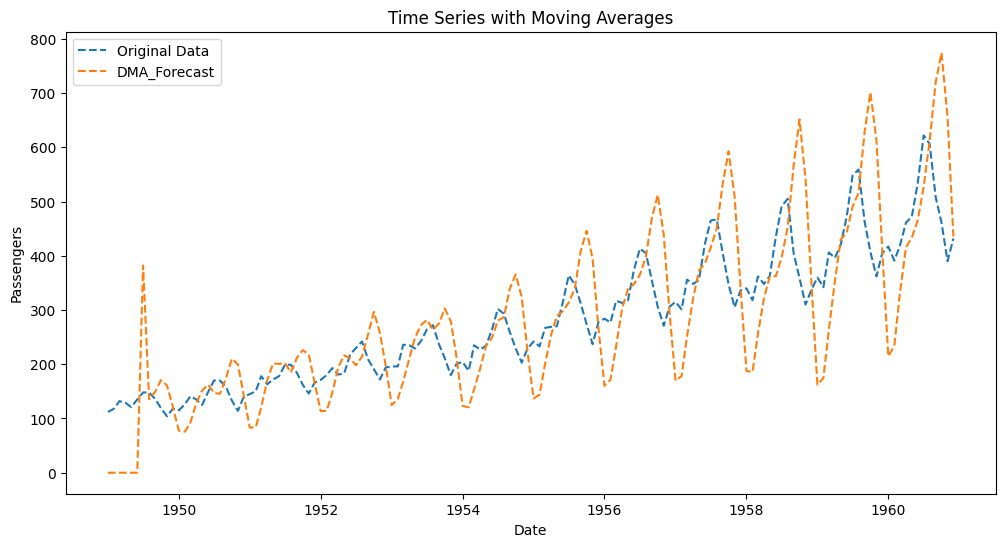

In [ ]:
# Plot the original time series and the calculated moving averages
plt.figure(figsize=(12, 6))
plt.plot(DMA['Passengers'], label='Original Data', linestyle='--')
plt.plot(DMA['DMA_Forecast'], label='DMA_Forecast', linestyle='--')

plt.title('Time Series with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
# Calculate RMSE and MAPE for the entire dataset
rmse = np.sqrt(mean_squared_error(DMA['Passengers'], DMA['DMA_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(DMA['Passengers'] - DMA['DMA_Forecast']) / DMA['Passengers']) * 100, 2)

# Display results
results = pd.DataFrame({'Method': ['DMA Forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
print(results)

         Method    RMSE   MAPE
0  DMA Forecast  102.85  29.74


### Weight Moving Average

#### Import Library and Read WMAset

In [ ]:
# Load and Read DMAset
WMA = pd.read_csv('Air_passengers.csv')
WMA.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Preprocess WMA and Visualization

In [ ]:
#Import time series DMA: Airline passenger traffic
WMA.columns = ['Month','Passengers']
WMA['Month'] = pd.to_datetime(WMA['Month'], format='%Y-%m')
WMA = WMA.set_index('Month')
WMA.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


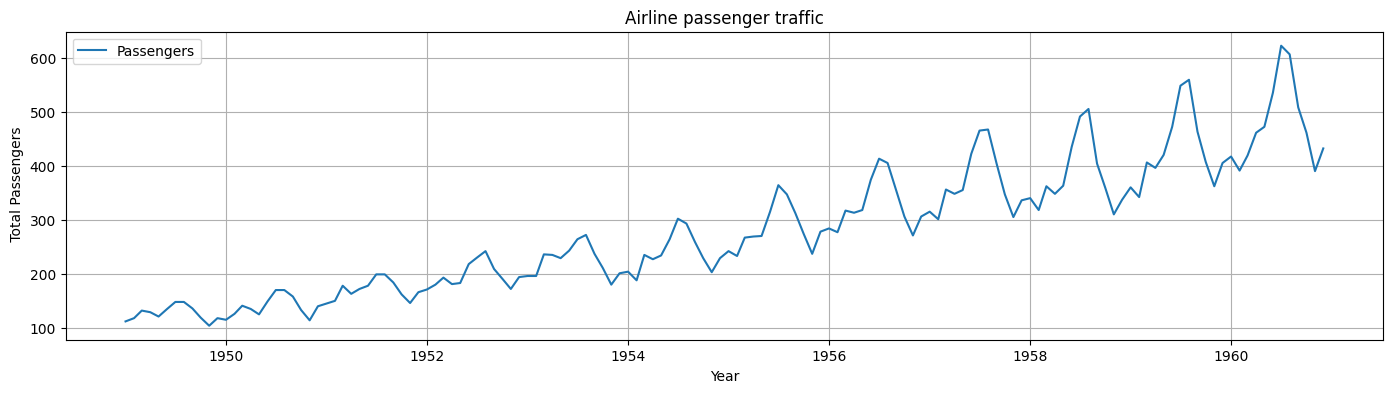

In [ ]:
# Plot the time series CMA
plt.figure(figsize=(17, 4))
plt.plot(WMA, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

#### Forecasting and Evaluating

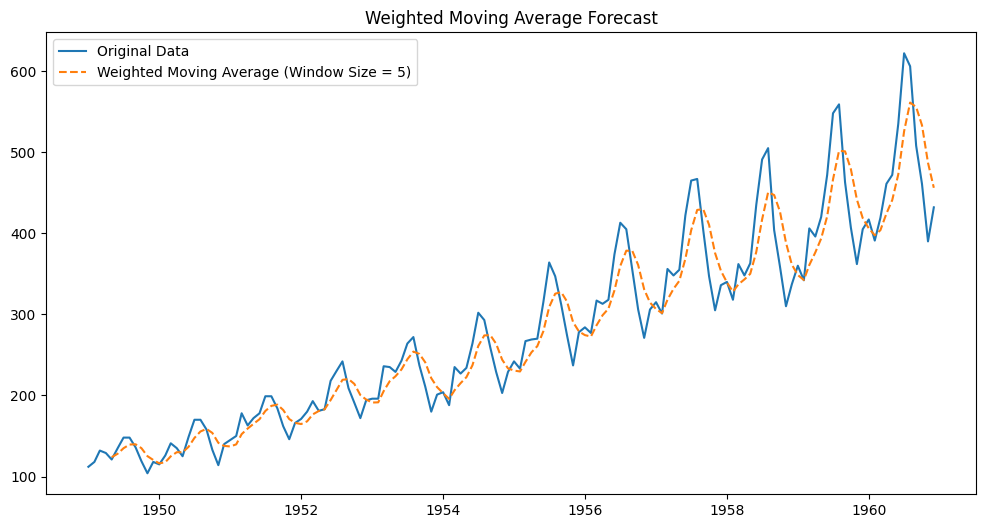

In [ ]:

# Assuming DMA is already loaded and formatted as described

# Define weights for the Weighted Moving Average
weights = [0.1, 0.15, 0.2, 0.25, 0.3]  # Adjust weights as needed
window_size = len(weights)

# Calculate Weighted Moving Average (WMA)
WMA['WMA'] = WMA['Passengers'].rolling(window=window_size).apply(lambda x: (x * weights).sum() / sum(weights), raw=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(WMA['Passengers'], label='Original Data')
plt.plot(WMA['WMA'], label=f'Weighted Moving Average (Window Size = {window_size})', linestyle='--')
plt.title('Weighted Moving Average Forecast')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming DMA and WMA are already calculated and in the DataFrame

# Drop rows with NaN values in the original data and WMA forecast
WMA_cleaned = WMA.dropna(subset=['Passengers', 'WMA'])  # Assuming 'Passengers' and 'WMA' are column names

# Define the original data and WMA forecast columns in your cleaned DataFrame
original_data_cleaned = WMA_cleaned['Passengers']
wma_forecast_cleaned = WMA_cleaned['WMA']

# Calculate RMSE and MAPE for the cleaned dataset
rmse_wma_cleaned = np.sqrt(mean_squared_error(original_data_cleaned, wma_forecast_cleaned)).round(2)
mape_wma_cleaned = np.round(np.mean(np.abs(original_data_cleaned - wma_forecast_cleaned) / original_data_cleaned) * 100, 2)

# Display results for WMA with cleaned data
results_wma_cleaned = pd.DataFrame({'Method': ['Weighted Moving Average'], 'MAPE': [mape_wma_cleaned], 'RMSE': [rmse_wma_cleaned]})
results_wma_cleaned = results_wma_cleaned[['Method', 'RMSE', 'MAPE']]
print(results_wma_cleaned)


                    Method   RMSE  MAPE
0  Weighted Moving Average  33.45  8.41


###Centered Moving Average

In [ ]:
CMA = pd.read_csv('Air_passengers.csv')
CMA.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
CMA.columns = ['Month','Passengers']
CMA['Month'] = pd.to_datetime(CMA['Month'], format='%Y-%m')
CMA = CMA.set_index('Month')
CMA.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
plt.figure(figsize=(17, 4))
plt.plot(CMA, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

In [ ]:
#Centered moving average method
ma_window = 11
CMA['cma_forecast'] = CMA['Passengers'].rolling(ma_window, center = True).mean() # forecastingnya moving average
CMA[:11]

,Passengers,cma_forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,127.454545
1949-07-01,148,128.000000
1949-08-01,148,127.727273
1949-09-01,136,127.181818


In [ ]:
#Plot train, test and forecast
plt.figure(figsize=(20,5))
plt.plot(CMA['Passengers'], label='Actual Data')
plt.plot(CMA['cma_forecast'], label='CMA')
plt.legend(loc='best')
plt.title('Center Moving Average Method')
plt.show()

SyntaxError: ignored

## Eksponential Smoothing

In [ ]:
# Load Data
data = pd.read_csv('Air_passengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#Import time series DMA: Airline passenger traffic
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


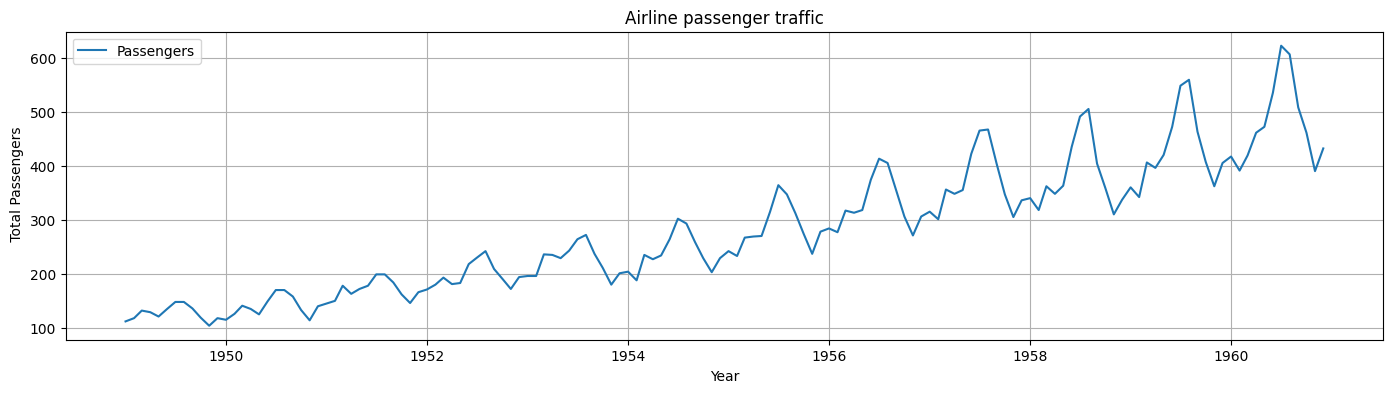

In [ ]:
# Plot the time series SES
plt.figure(figsize=(17, 4))
plt.plot(data, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

In [ ]:
model = sm.tsa.SimpleExpSmoothing(data['Passengers'])
ses_model = model.fit(smoothing_level=0.3)
data['SES_Forecast'] = ses_model.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
model2 = sm.tsa.ExponentialSmoothing(data['Passengers'], trend='add')
des_model = model2.fit(smoothing_level=0.3, smoothing_slope=0.2)
data['DES_Forecast'] = des_model.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-21-a29de989f6ca>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  des_model = model2.fit(smoothing_level=0.3, smoothing_slope=0.2)


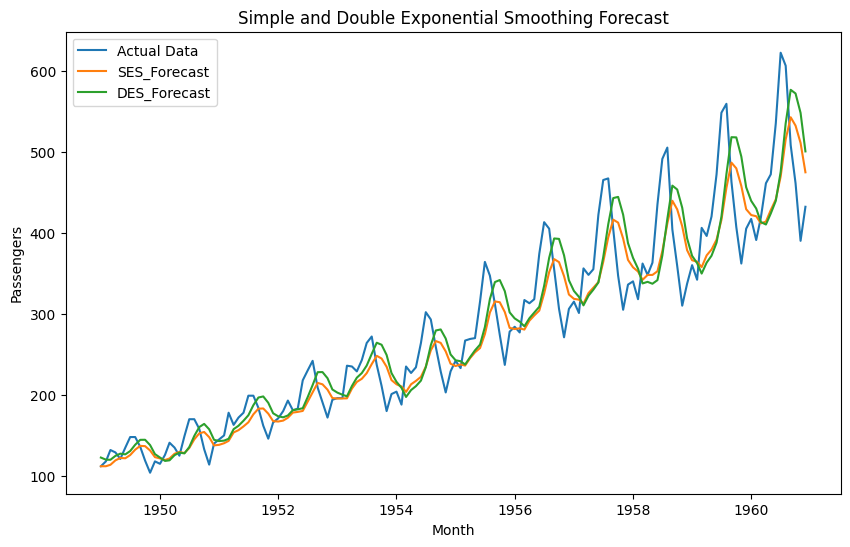

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Actual Data')
plt.plot(data['SES_Forecast'], label='SES_Forecast')
plt.plot(data['DES_Forecast'], label='DES_Forecast')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Simple and Double Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [ ]:
# Assuming 'Actual' column contains the actual values and 'Forecast' and 'DesForecast' contain the predicted values
actual_values = data['Passengers']

# Simple Exponential Smoothing
forecast_ses = data['SES_Forecast']
rmse_ses = np.sqrt(mean_squared_error(actual_values, forecast_ses))
mape_ses = np.mean(np.abs((actual_values - forecast_ses) / actual_values)) * 100

# Double Exponential Smoothing
forecast_des = data['DES_Forecast']
rmse_des = np.sqrt(mean_squared_error(actual_values, forecast_des))
mape_des = np.mean(np.abs((actual_values - forecast_des) / actual_values)) * 100

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Method': ['Simple Exponential Smoothing', 'Double Exponential Smoothing'],
    'RMSE': [rmse_ses, rmse_des],
    'MAPE': [mape_ses, mape_des]
})

results_df

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,45.719628,11.244239
1,Double Exponential Smoothing,52.036581,13.253029


## Decomposition

Time Series Decomposition adalah adalah teknik yang membagi time series menjadi beberapa komponen, masing-masing mewakili kategori pola dasar, trend, seasonality, dan noise.

1.   **Seasonality** mendeskripsikan sinyal periodik dalam deret waktu.
2.   **Trend**: menjelaskan apakah deret waktu menurun, konstan, atau meningkat dari waktu ke waktu.
3.   **Noise**: derau berupa variabilitas data yang tidak dapat dijelaskan oleh model.



Decomposition digunakan untuk mengetahui tren, musiman, dan komponen variabilitas lain dari model time series

Manfaat Decomposition adalah untuk:


*   Menunjukkan fluktuasi tren
*   Memberikan wawasan tentang faktor-faktor mendasar yang memengaruhi time series


In [ ]:
data = pd.read_csv('Air_passengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


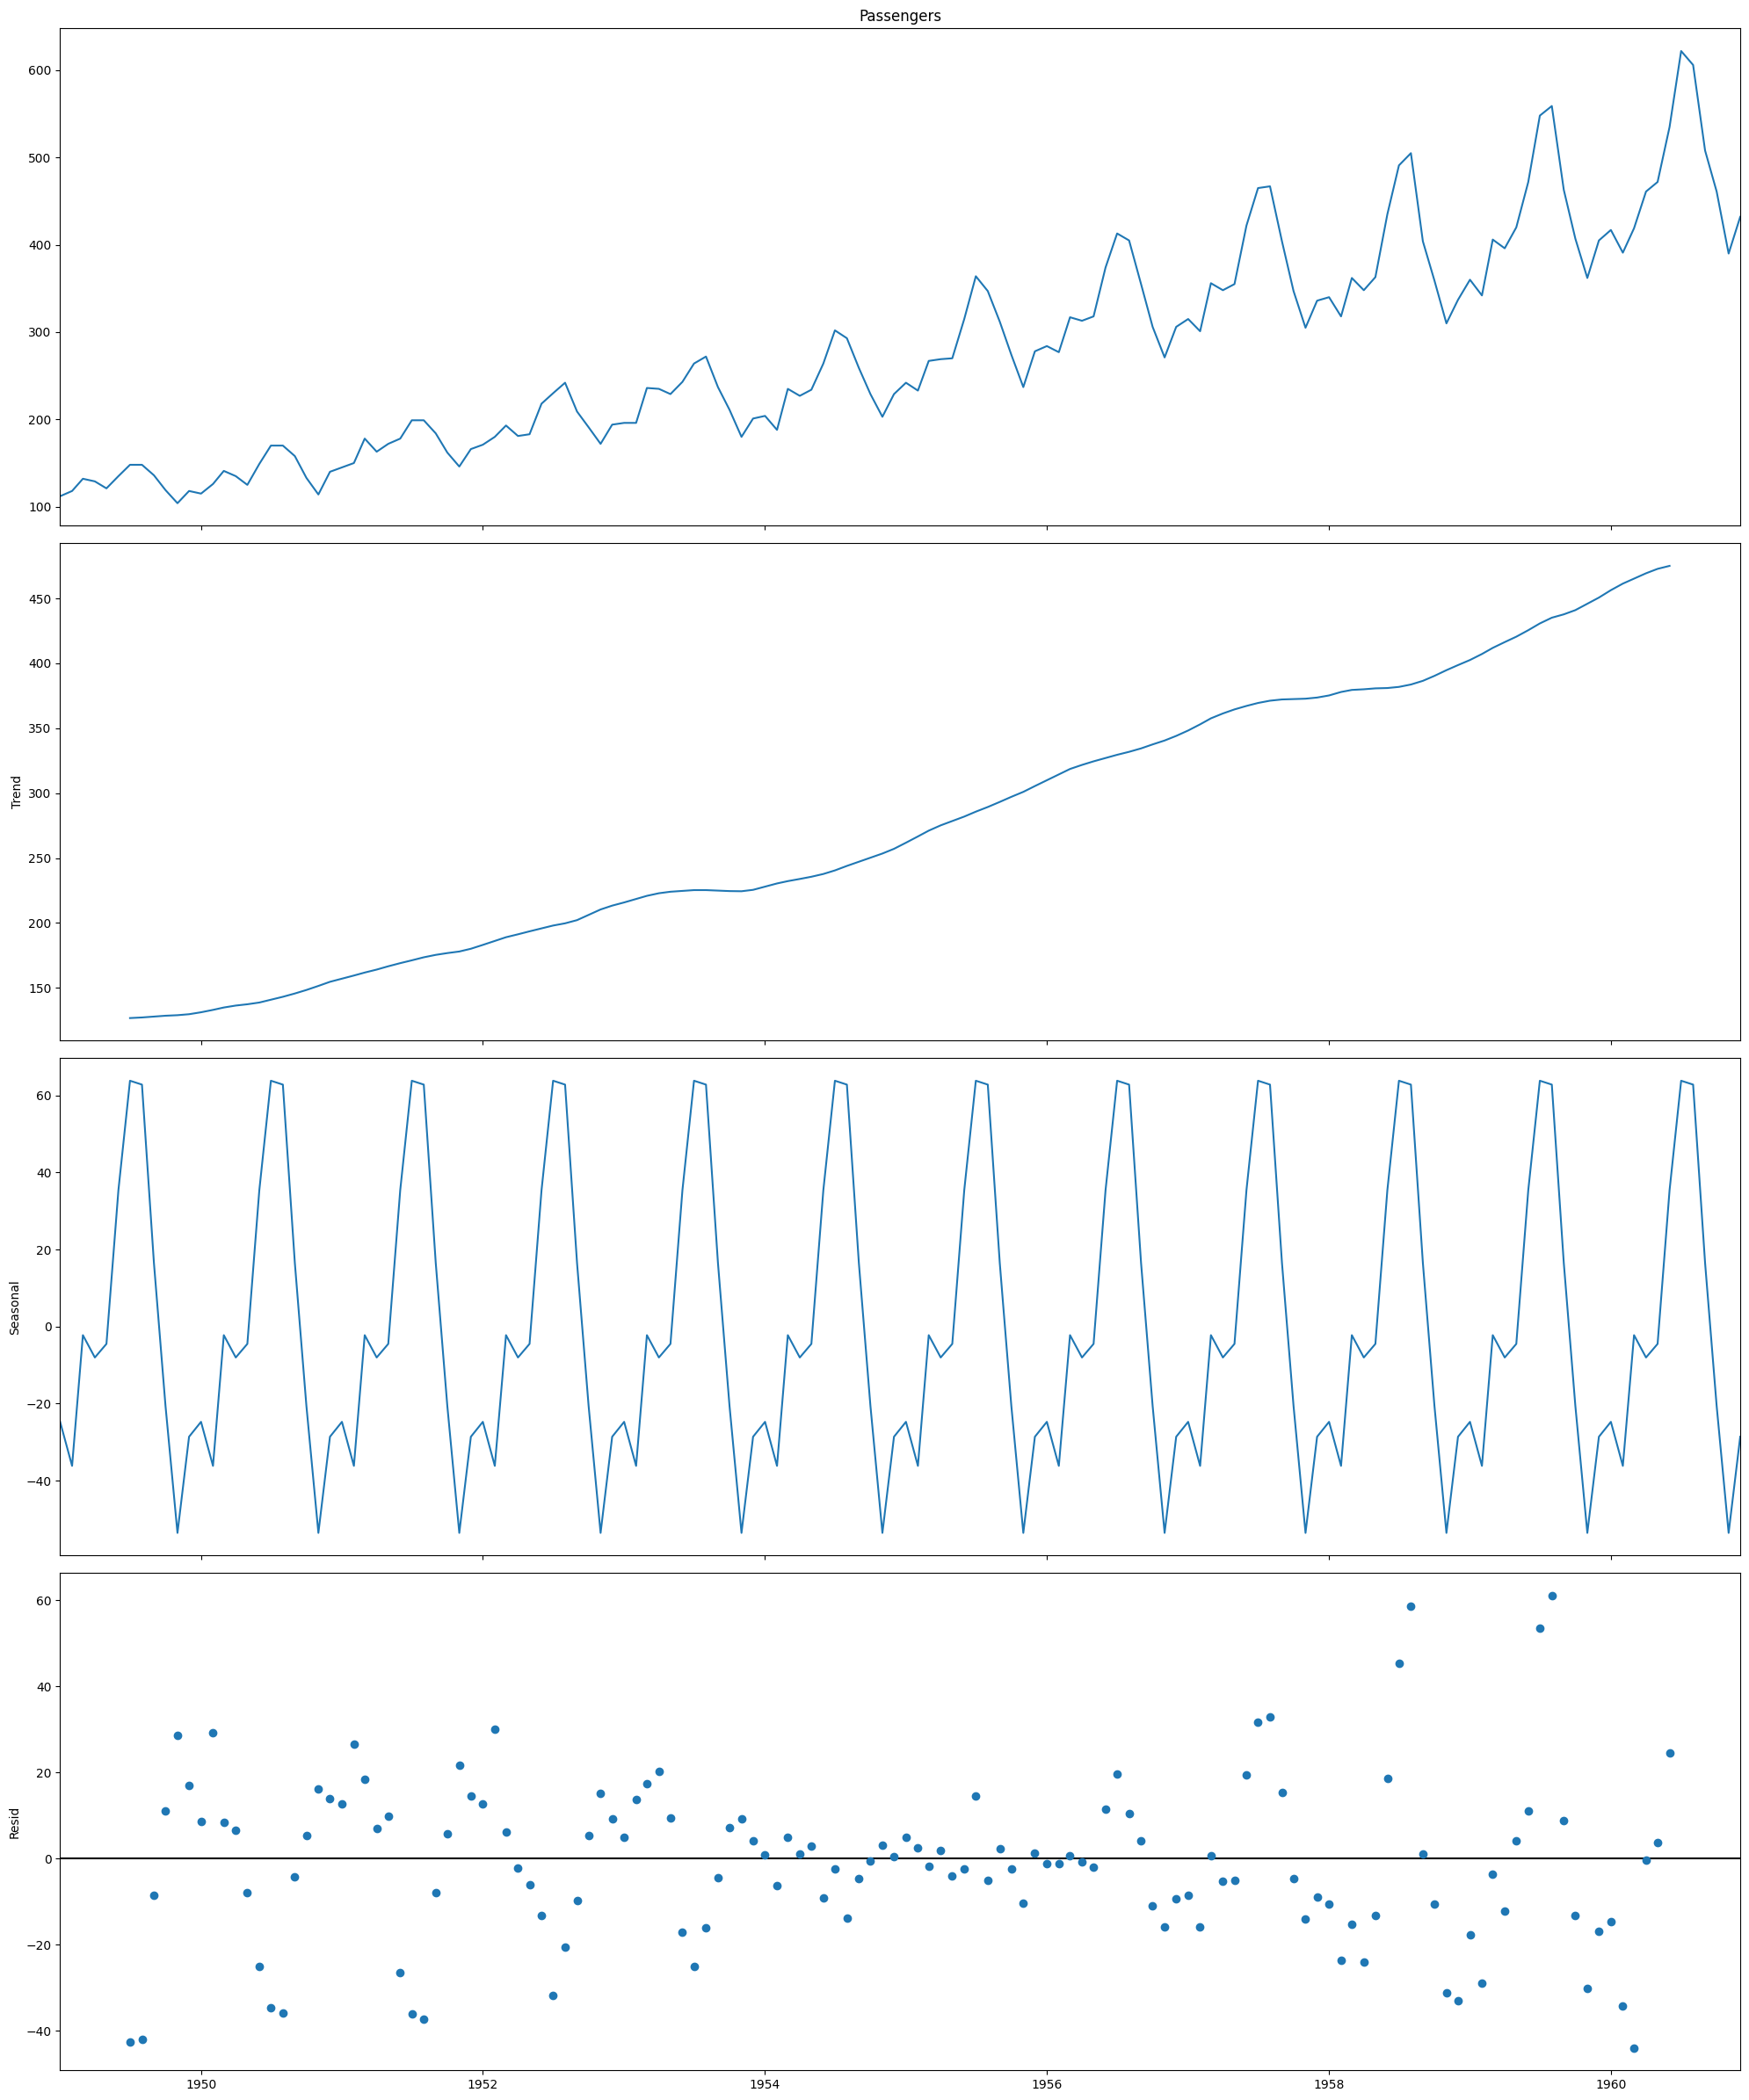

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

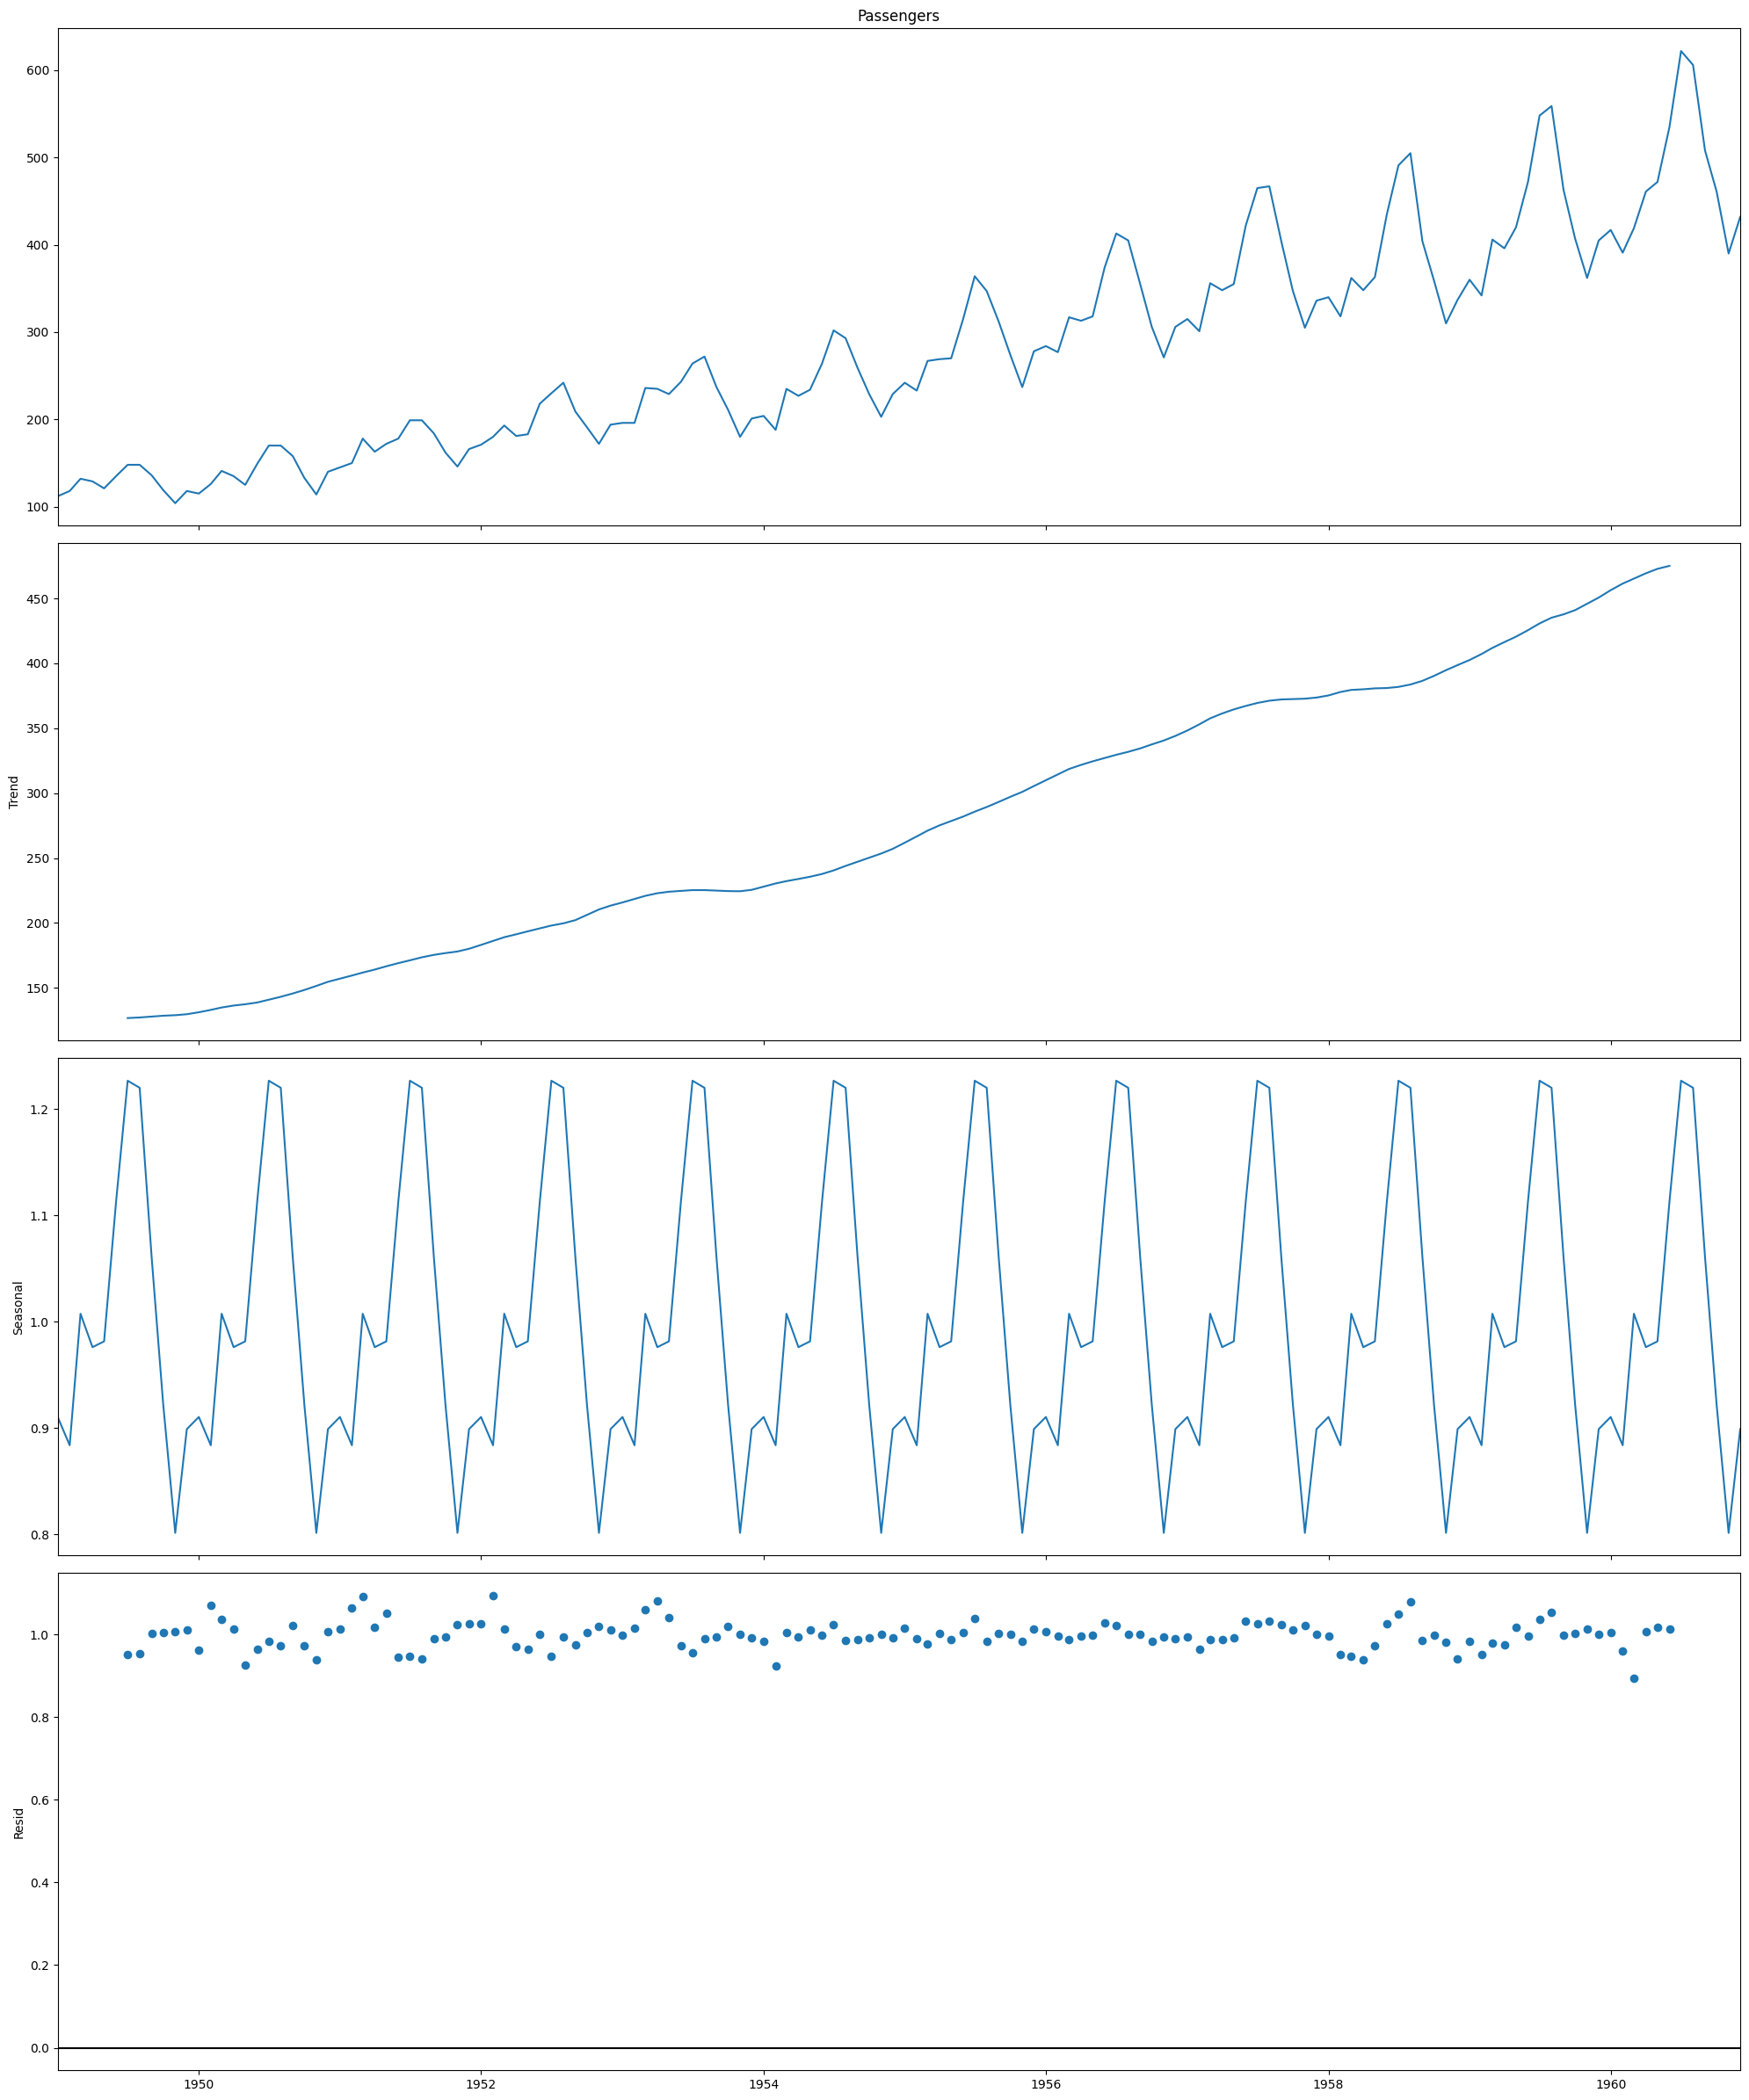

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()